# 3D Hyperparameter Tuning for Fuzzy C-Means

Description

In [1]:
# Reload the notebook if an external file is updated
%load_ext autoreload
%autoreload 2

import os
import sys

from pathlib import Path

path = (
    Path
    .cwd()
    .parent
    .parent
    .joinpath('warbler.py')
)

os.chdir(path)
sys.path.append(path)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from constant import PICKLE, TUNING
from datatype.dataset import Dataset
from fcmeans import FCM
from textwrap import dedent

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
TUNING.mkdir(parents=True, exist_ok=True)

In [5]:
dataset = Dataset('segment')
dataframe = dataset.load()

In [6]:
x = np.array(
    [
        dataframe.umap_x_3d,
        dataframe.umap_y_3d,
        dataframe.umap_z_3d
    ]
).transpose()

In [7]:
amount = np.arange(start=2, stop=27, step=1)
models = []

total = amount.size

for n_clusters in amount:
    print(f"Processing: {n_clusters}/{total}")
    
    fcm = FCM(n_clusters=n_clusters)
    fcm.fit(x)
    models.append(fcm)

Processing: 2/25
Processing: 3/25
Processing: 4/25
Processing: 5/25
Processing: 6/25
Processing: 7/25
Processing: 8/25
Processing: 9/25
Processing: 10/25
Processing: 11/25
Processing: 12/25
Processing: 13/25
Processing: 14/25
Processing: 15/25
Processing: 16/25
Processing: 17/25
Processing: 18/25
Processing: 19/25
Processing: 20/25
Processing: 21/25
Processing: 22/25
Processing: 23/25
Processing: 24/25
Processing: 25/25
Processing: 26/25


e:\code\personal\warbler.py\venv\lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


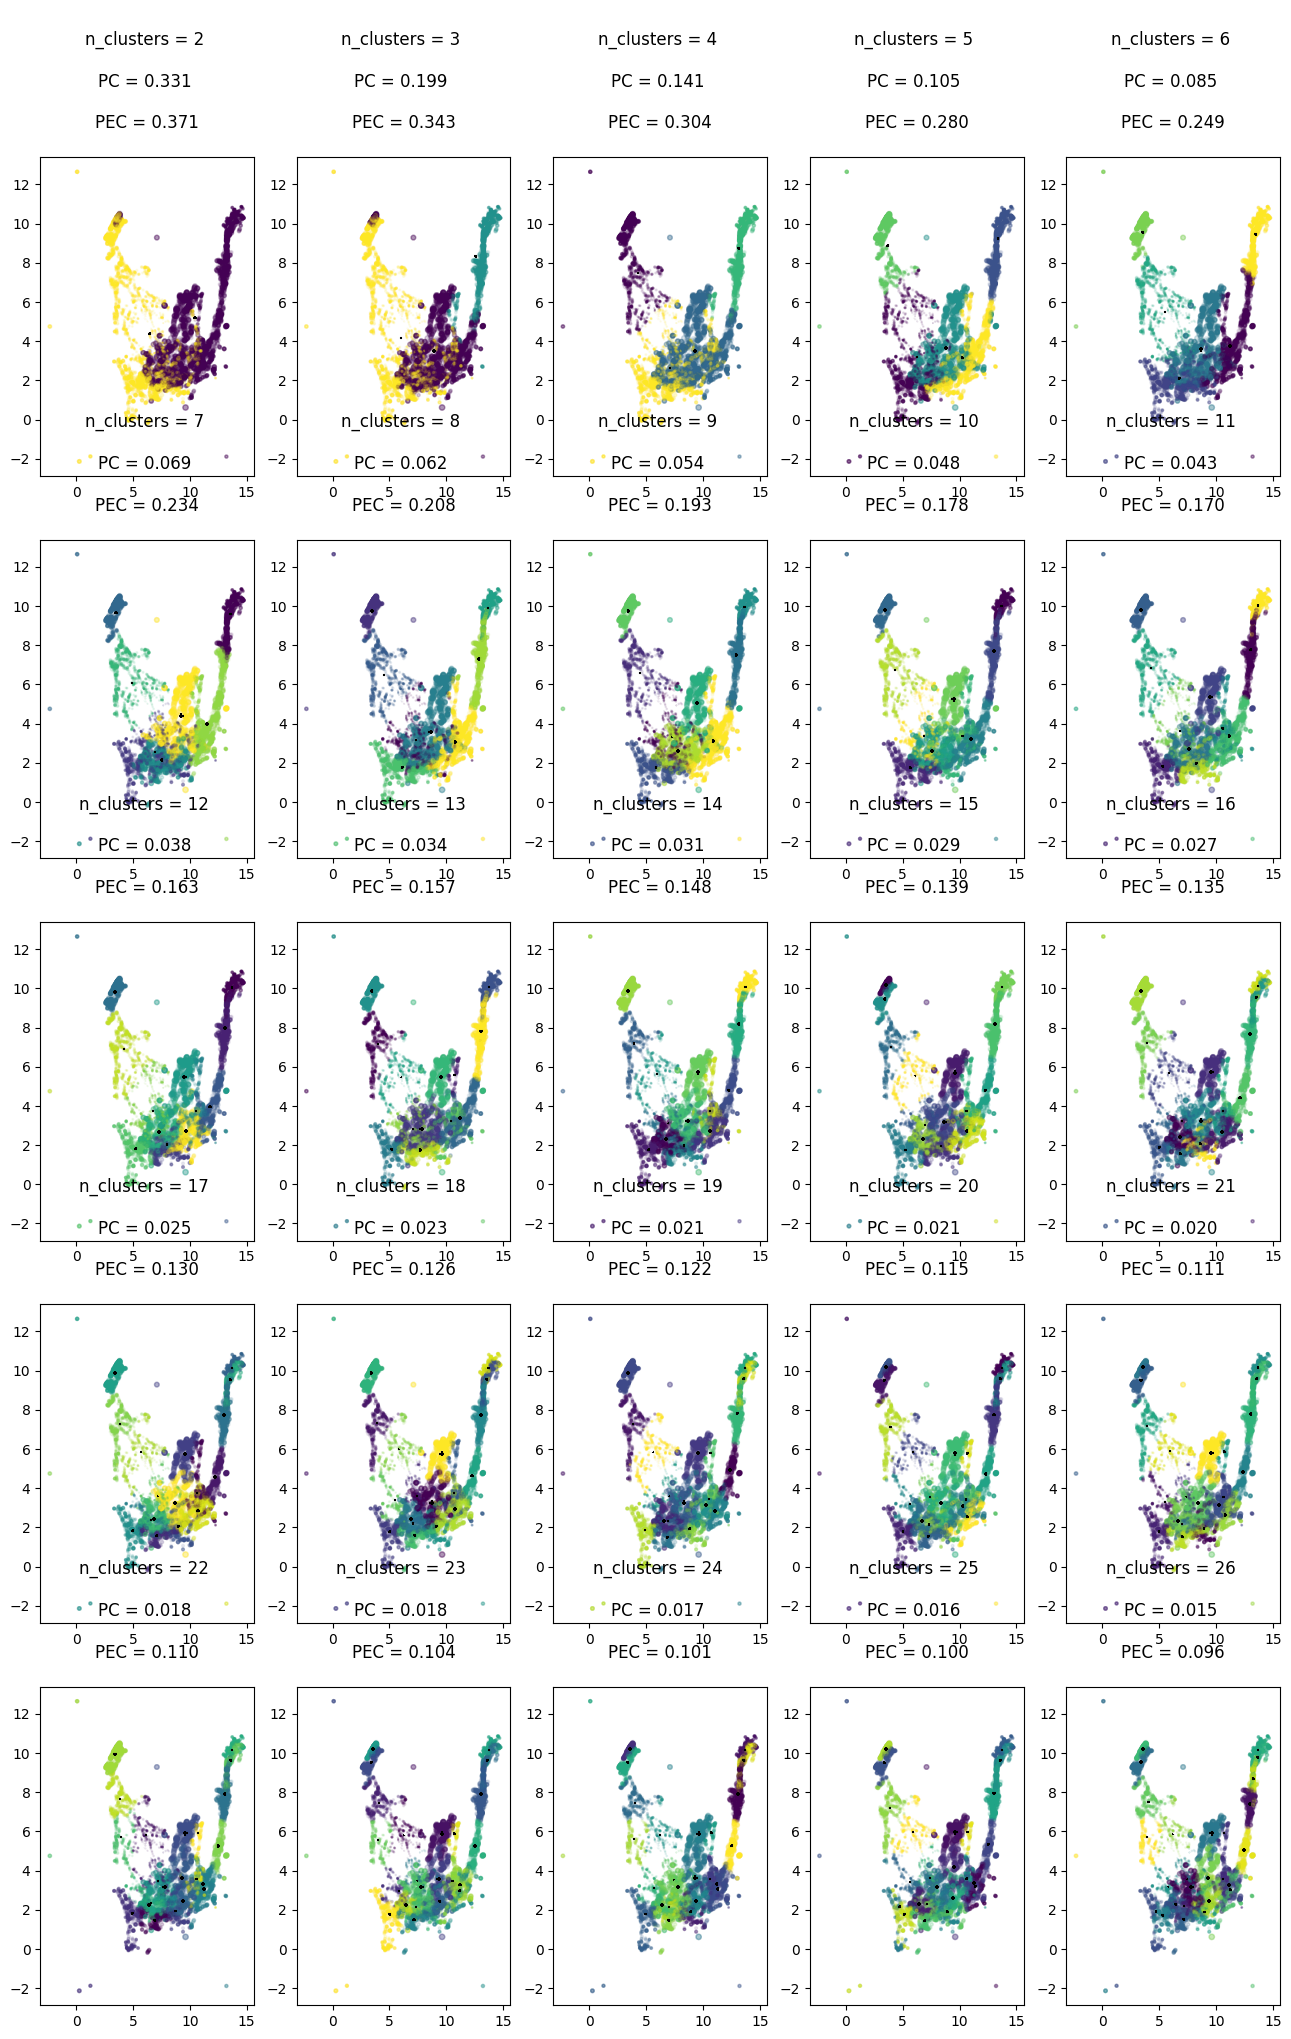

In [8]:
num_clusters = len(amount)

rows = int(np.ceil(np.sqrt(num_clusters)))
cols = int(np.ceil(num_clusters / rows))

fig, axes = plt.subplots(
    rows, 
    cols, 
    figsize=(16, 24)
)

u = {}
results = []

for n_clusters, model, axe in zip(amount, models, axes.ravel()):
    template = {}

    # Find the highest partition coefficient (PC) 
    pc = model.partition_coefficient
    
    # Find the lowest partition entropy coefficient (PEC)
    pec = model.partition_entropy_coefficient
    
    fcm_centers = model.centers
    fcm_labels = model.predict(x)
    
    u[n_clusters] = list(model.u)
    
    template['n_clusters'] = n_clusters
    template['partition_coefficient'] = pc
    template['partition_entropy_coefficient'] = pec
    template['difference'] = pec - pc
    
    axe.scatter(
        x[:, 0], 
        x[:, 1],
        x[:, 2],
        c=fcm_labels, 
        alpha=0.1
    )
    
    axe.scatter(
        fcm_centers[:, 0], 
        fcm_centers[:, 1],
        fcm_centers[:, 2],
        marker='+', 
        c='black'
    )
    
    title = dedent(
        f"""
        n_clusters = {n_clusters} \n 
        PC = {pc:.3f} \n 
        PEC = {pec:.3f}
        """
    )
    
    axe.set_title(title)
    
    results.append(template)

In [9]:
path = TUNING.joinpath('n_cluster_fuzzy_3d.png')
    
fig.tight_layout(pad=5.0)

fig.savefig(
    path,
    dpi=300,
    format='png'
)

In [10]:
membership = pd.DataFrame.from_dict(u)
scoring = pd.DataFrame.from_dict(results)

In [11]:
ascending = [
    False
]

scores = [
    'difference'
]

scoring.sort_values(
    scores, 
    ascending=ascending, 
    inplace=True
)

In [12]:
path = TUNING.joinpath('membership_fuzzy_3d.xlsx')
membership.to_excel(path, sheet_name='membership_fuzzy_3d')

path = TUNING.joinpath('scoring_fuzzy_3d.xlsx')
scoring.to_excel(path, sheet_name='scoring_fuzzy_3d')

path = TUNING.joinpath('scoring_fuzzy_3d.html')
scoring.to_html(path)

In [13]:
scoring.head(1)

,n_clusters,partition_coefficient,partition_entropy_coefficient
24,26,0.015037,0.095925


In [14]:
best = scoring.head(1)

In [15]:
n_clusters = best.n_clusters.squeeze()

In [16]:
fcm = FCM(n_clusters=n_clusters)
fcm.fit(x)

In [17]:
centers = fcm.centers
labels = fcm.predict(x)

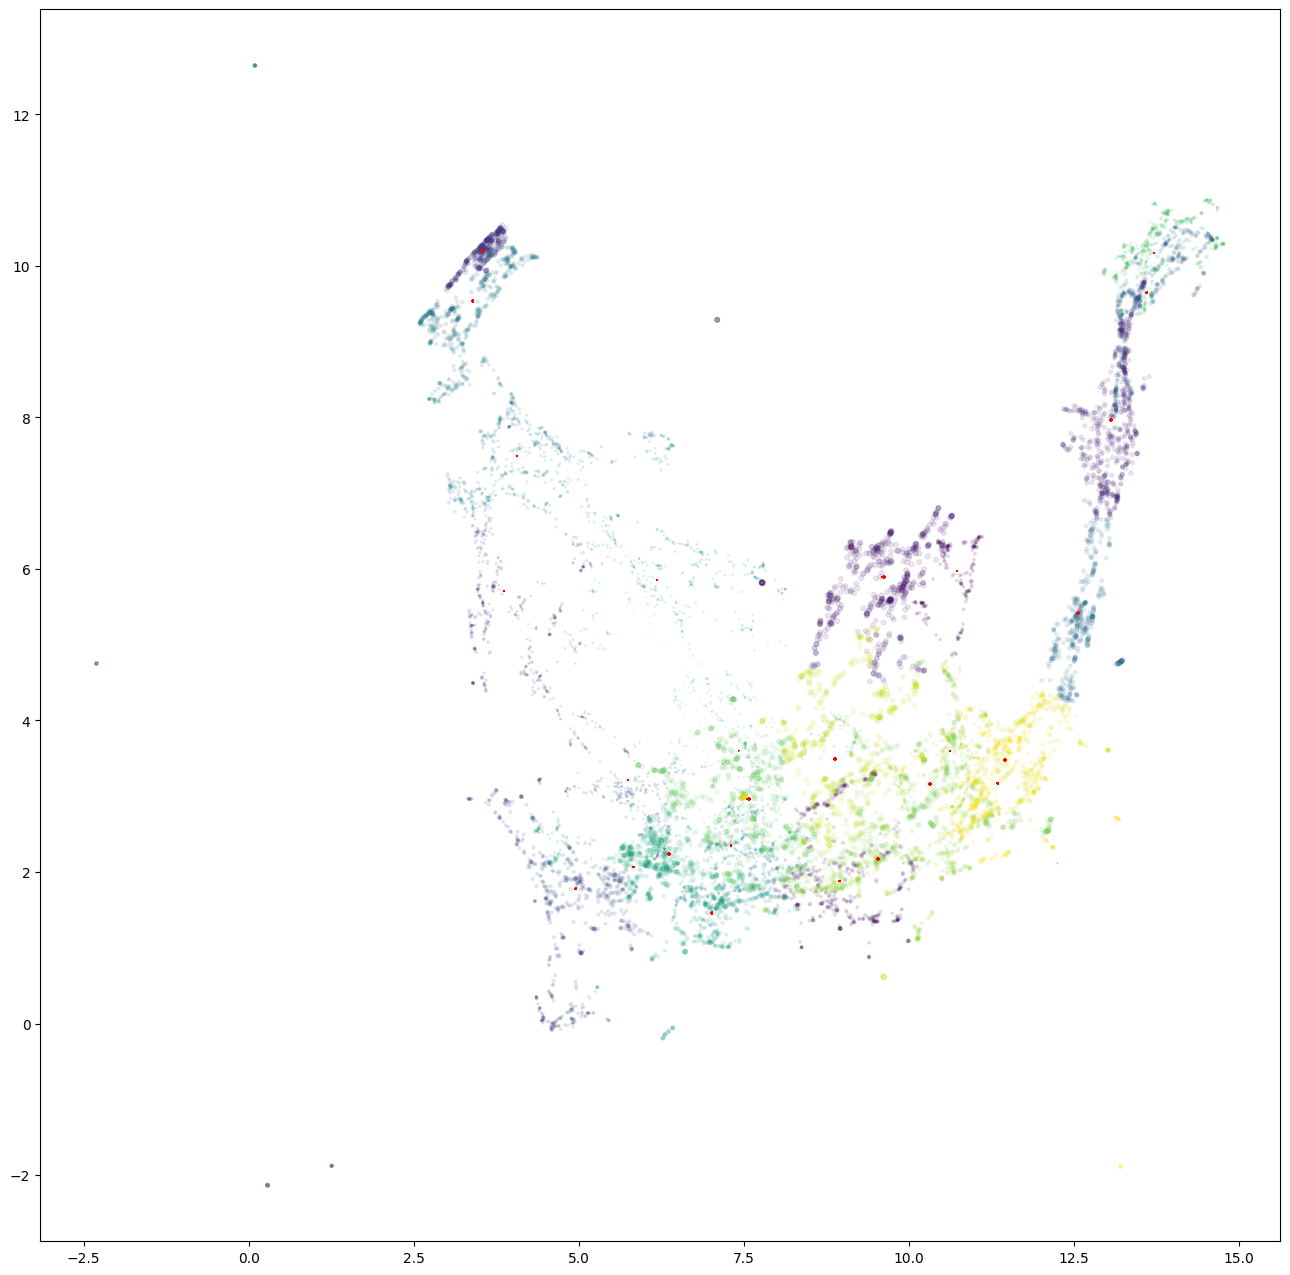

In [21]:
fig, ax = plt.subplots(
    figsize=(16, 16)
)

ax.scatter(
    x[:, 0], 
    x[:, 1],
    x[:, 2],
    c=labels, 
    alpha=0.10
)

ax.scatter(
    centers[:, 0], 
    centers[:, 1],
    centers[:, 2],
    marker='+',  
    c='red'
)

In [22]:
path = TUNING.joinpath('center_fuzzy_3d.png')

fig.savefig(
    path,
    bbox_inches='tight',
    dpi=300,
    format='png'
)